# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
#Dependencies
from citipy import citipy
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import json
openweatherkey = 'c70a804da79087d06508a2ecb3894fb2'

## Generate Cities List

In [3]:
#Randomly generate latitude and longitude numbers. lookup nearest city using citipy

# Empty series to hold all the names of cities and countries
randCity = []
randCountry = []
loopcnt = 0

#Loop through until at least 500 unique city names are found
while len(randCity) < 500 :
    # Loop counter to track number of loops made
    loopcnt +=1
    
    # Randomly generate latitude
    lat_pos = random.randint(0,2)
    base_lat = random.randint(0,91)
    dec_lat = random.random()/100
    lat = base_lat + dec_lat
    if lat_pos == 1:
        lat = lat * -1
    #print(f"The lattitude is: {lat}") 
    
    # Randomly generate longitude
    lng_pos = random.randint(0,2)
    base_lng = random.randint(0,181)
    dec_lng = random.random()/100
    lng = base_lng + dec_lng
    if lng_pos == 1:
        lng = lng * -1
    #print(f"The longitude is: {lng}") 
    
    # Call citipy file to get nearest city based on random lat and lng
    city = citipy.nearest_city(lat, lng)
    
    # Test to see if the random city is already in the list, if not, add it to the city and country lists
    foundCity = False
    for j in range(len(randCity)):
        if city.city_name == randCity[j]:
            foundCity = True
    if foundCity==False  :   
        randCity.append(city.city_name)
        randCountry.append(city.country_code)

In [4]:
# Build query Url
base_url = "http://api.openweathermap.org/data/2.5/weather?"
api_key = openweatherkey
units = "imperial"

query_url = base_url + "appid=" + api_key + "&units=" + units + "&q="

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
# Loop through the list of cities and perform request for data on each
search_data = []
cityList = []
countryList = []

searchCnt = 0
print("Begin API Call to OpenWeather Database ")
print("---------------------------------------")
for city in randCity:
    searchCnt += 1
    print(f"Processing record {searchCnt} for the city: {city}")   
    response = requests.get(query_url + city).json()
    searchCityID = response.get("id")
    if response.get("id"):
        print(f"     Record found for city: {city}    city id: {searchCityID}")
        search_data.append(response)
        cityList.append(city)
        countryList.append(randCountry[searchCnt-1])
    else:
        print(f"     No weather record found for city: {city}")
          
print("---------------------------------------")
print("Processing Complete")

Begin API Call to OpenWeather Database 
---------------------------------------
Processing record 1 for the city: carnarvon
     Record found for city: carnarvon    city id: 1014034
Processing record 2 for the city: busselton
     Record found for city: busselton    city id: 2075265
Processing record 3 for the city: langsa
     Record found for city: langsa    city id: 1214724
Processing record 4 for the city: fort smith
     Record found for city: fort smith    city id: 4111410
Processing record 5 for the city: ossora
     Record found for city: ossora    city id: 2122389
Processing record 6 for the city: ngunguru
     Record found for city: ngunguru    city id: 2186111
Processing record 7 for the city: nikolskoye
     Record found for city: nikolskoye    city id: 546105
Processing record 8 for the city: belushya guba
     No weather record found for city: belushya guba
Processing record 9 for the city: avera
     Record found for city: avera    city id: 4231997
Processing record 10 f

     Record found for city: lorengau    city id: 2092164
Processing record 83 for the city: pitimbu
     Record found for city: pitimbu    city id: 3391889
Processing record 84 for the city: xuddur
     Record found for city: xuddur    city id: 49747
Processing record 85 for the city: esperance
     Record found for city: esperance    city id: 3573739
Processing record 86 for the city: staryy biser
     No weather record found for city: staryy biser
Processing record 87 for the city: sarahan
     Record found for city: sarahan    city id: 1257277
Processing record 88 for the city: port hardy
     Record found for city: port hardy    city id: 6111862
Processing record 89 for the city: makakilo city
     Record found for city: makakilo city    city id: 5850554
Processing record 90 for the city: karakendzha
     No weather record found for city: karakendzha
Processing record 91 for the city: kirovskaya
     Record found for city: kirovskaya    city id: 548390
Processing record 92 for the 

     No weather record found for city: umzimvubu
Processing record 164 for the city: kruisfontein
     Record found for city: kruisfontein    city id: 986717
Processing record 165 for the city: mahebourg
     Record found for city: mahebourg    city id: 934322
Processing record 166 for the city: dali
     Record found for city: dali    city id: 1814093
Processing record 167 for the city: macaboboni
     No weather record found for city: macaboboni
Processing record 168 for the city: illoqqortoormiut
     No weather record found for city: illoqqortoormiut
Processing record 169 for the city: korla
     No weather record found for city: korla
Processing record 170 for the city: yerbogachen
     Record found for city: yerbogachen    city id: 2012956
Processing record 171 for the city: puerto ayora
     Record found for city: puerto ayora    city id: 3652764
Processing record 172 for the city: amderma
     No weather record found for city: amderma
Processing record 173 for the city: dafeng


     Record found for city: dhidhdhoo    city id: 1337612
Processing record 246 for the city: phan rang
     No weather record found for city: phan rang
Processing record 247 for the city: krabi
     Record found for city: krabi    city id: 1152633
Processing record 248 for the city: bolshaya chernigovka
     No weather record found for city: bolshaya chernigovka
Processing record 249 for the city: ugoofaaru
     Record found for city: ugoofaaru    city id: 1337619
Processing record 250 for the city: dukat
     Record found for city: dukat    city id: 786562
Processing record 251 for the city: visby
     Record found for city: visby    city id: 2662689
Processing record 252 for the city: zaozerne
     Record found for city: zaozerne    city id: 702421
Processing record 253 for the city: mouzouras
     Record found for city: mouzouras    city id: 256660
Processing record 254 for the city: jalu
     Record found for city: jalu    city id: 86049
Processing record 255 for the city: coxim
 

     Record found for city: lexington    city id: 4297983
Processing record 328 for the city: meyungs
     No weather record found for city: meyungs
Processing record 329 for the city: saint-augustin
     Record found for city: saint-augustin    city id: 3031582
Processing record 330 for the city: bud
     Record found for city: bud    city id: 7626370
Processing record 331 for the city: namibe
     Record found for city: namibe    city id: 3347019
Processing record 332 for the city: sulangan
     Record found for city: sulangan    city id: 1685422
Processing record 333 for the city: mananjary
     Record found for city: mananjary    city id: 1056151
Processing record 334 for the city: mezen
     Record found for city: mezen    city id: 527321
Processing record 335 for the city: tual
     Record found for city: tual    city id: 1623197
Processing record 336 for the city: jiexiu
     Record found for city: jiexiu    city id: 1805833
Processing record 337 for the city: paradwip
     No w

     Record found for city: palana    city id: 2122262
Processing record 411 for the city: aurillac
     Record found for city: aurillac    city id: 3036016
Processing record 412 for the city: kapiri mposhi
     Record found for city: kapiri mposhi    city id: 913029
Processing record 413 for the city: kalga
     Record found for city: kalga    city id: 2023286
Processing record 414 for the city: vastervik
     No weather record found for city: vastervik
Processing record 415 for the city: una
     Record found for city: una    city id: 3445781
Processing record 416 for the city: khonsa
     Record found for city: khonsa    city id: 1266668
Processing record 417 for the city: vostok
     Record found for city: vostok    city id: 2013279
Processing record 418 for the city: shitanjing
     Record found for city: shitanjing    city id: 1794971
Processing record 419 for the city: udachnyy
     Record found for city: udachnyy    city id: 2014624
Processing record 420 for the city: majene
  

     Record found for city: morag    city id: 3091462
Processing record 493 for the city: riwaka
     Record found for city: riwaka    city id: 2183406
Processing record 494 for the city: grimari
     No weather record found for city: grimari
Processing record 495 for the city: ushumun
     Record found for city: ushumun    city id: 2014038
Processing record 496 for the city: yarada
     Record found for city: yarada    city id: 1252783
Processing record 497 for the city: nyagan
     Record found for city: nyagan    city id: 1496476
Processing record 498 for the city: artigas
     Record found for city: artigas    city id: 3443758
Processing record 499 for the city: wajima
     Record found for city: wajima    city id: 1848976
Processing record 500 for the city: chuy
     Record found for city: chuy    city id: 3443061
---------------------------------------
Processing Complete


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
#print(json.dumps(search_data[2], indent=4))
len(search_data)

<function print>

In [10]:
# Use list comprehension to gather necessary data series

lat_data = [data.get("coord").get("lat") for data in search_data]
lng_data = [data.get("coord").get("lon") for data in search_data]
temp_data = [data.get("main").get("temp") for data in search_data]
humid_data = [data.get("main").get("humidity") for data in search_data]
cloud_data =[data.get("clouds").get("all") for data in search_data]
wind_data = [data.get("wind").get("speed") for data in search_data]

In [11]:
# Create data frame with aggregated data
weather_data = pd.DataFrame({"cityName":cityList,
                            "country":countryList,
                            "lat":lat_data,
                            "lng":lng_data,
                            "temp":temp_data,
                            "humidity":humid_data,
                            "cloudiness":cloud_data,
                            "winds":wind_data})

In [12]:
# Force column order
weather_data = weather_data[["cityName","country","lat","lng","temp","humidity","cloudiness","winds"]]
weather_data.head()

,cityName,country,lat,lng,temp,humidity,cloudiness,winds
0,carnarvon,au,-30.97,22.13,47.75,21,0,3.71
1,busselton,au,-33.64,115.35,57.83,100,48,16.91
2,langsa,id,4.47,97.97,70.61,96,80,2.04
3,fort smith,us,35.39,-94.42,82.99,59,1,5.82
4,ossora,ru,59.24,163.07,46.04,94,68,14.79


In [13]:
# Save weather data to csv file
weather_data.to_csv("weatherdata.csv", encoding="utf-8", index=False)

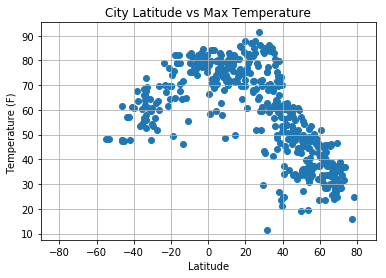

In [14]:
# Build a scatter plot for each data type

# Latitude vs Max Temp
plt.scatter(weather_data["lat"], weather_data["temp"], marker="o")

# Add chart labels
plt.title("City Latitude vs Max Temperature")
plt.ylabel("Temperature (F) ")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim(-90,90)

# Save the figure
plt.savefig("Lat_vs_MaxTemp.png")
# Show plot
plt.show()

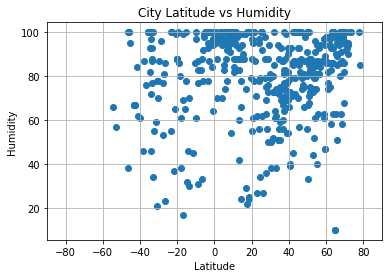

In [15]:
# Latitude vs Humidity
plt.scatter(weather_data["lat"], weather_data["humidity"], marker="o")

# Add chart labels
plt.title("City Latitude vs Humidity")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim(-90,90)

# Save the figure
plt.savefig("Lat_vs_Humidity.png")

# Show plot
plt.show()

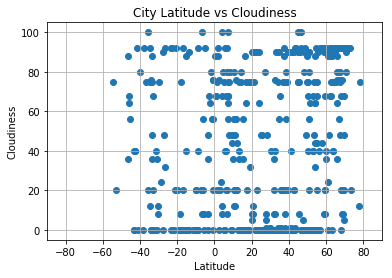

In [16]:
# Latitude vs Cloudiness
plt.scatter(weather_data["lat"], weather_data["cloudiness"], marker="o")

# Add chart labels
plt.title("City Latitude vs Cloudiness")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim(-90,90)

# Save the figure
plt.savefig("Lat_vs_Cloudiness.png")

# Show plot
plt.show()

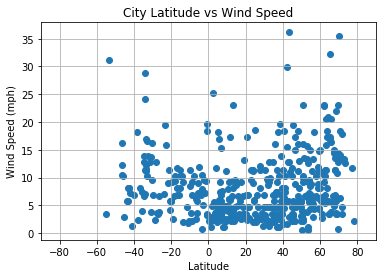

In [17]:
# Latitude vs Wind Speed
plt.scatter(weather_data["lat"], weather_data["winds"], marker="o")

# Add chart labels
plt.title("City Latitude vs Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim(-90,90)

# Save the figure
plt.savefig("Lat_vs_WindSpeed.png")

# Show plot
plt.show()

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

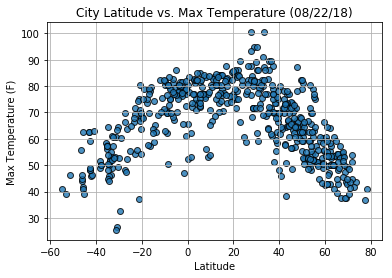

#### Latitude vs. Humidity Plot

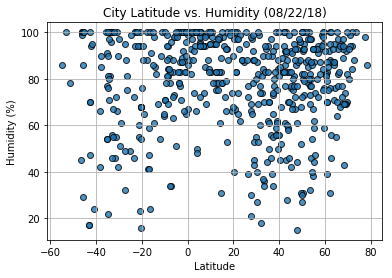

#### Latitude vs. Cloudiness Plot

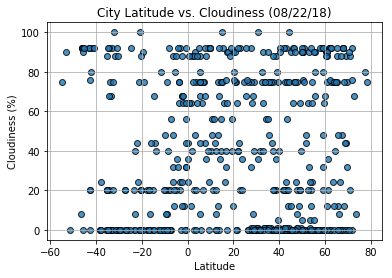

#### Latitude vs. Wind Speed Plot

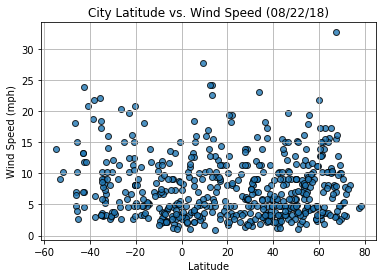